# Откроем

In [1]:
%pip install pandas-profiling
%pip install imblearn
%pip install optuna

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
import optuna
from optuna.samplers import TPESampler
import joblib
import warnings

warnings.filterwarnings("ignore")

In [3]:
test = pd.read_csv('D:/titanic/test.csv')
train = pd.read_csv('D:/titanic/train.csv')
gender_submission = pd.read_csv('D:/titanic/gender_submission.csv')

In [4]:
display(test)
#test.profile_report()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
display(train)
#train.profile_report()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
display(gender_submission)
#gender_submission.profile_report()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
train.duplicated().sum()

0

In [8]:
test.duplicated().sum()

0

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Откорректируем данные 

In [11]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [12]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [13]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train['Age'].fillna(train['Age'].median(), inplace=True) #Заполню Age медианным значением, корреляция с ЦП у данного признака
test['Age'].fillna(test['Age'].median(), inplace=True)   #незначительна

In [16]:
train[train.isnull().any(1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [17]:
test[test.isnull().any(1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [18]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True) #Одно потерянное значение заменим средним значением
train['Embarked'].fillna('S', inplace=True) #Заменим два пропущенных значения Embarked любым доступным значением

In [19]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Исследовательский анализ

In [21]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(15, 5)}, palette=colors) #Задам настройки таблиц

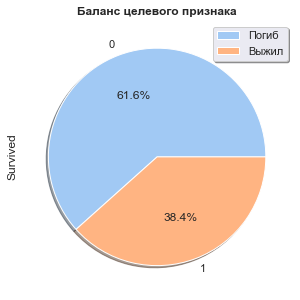

In [25]:
train.Survived.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')
plt.legend(['Погиб', 'Выжил'], shadow=True)
plt.title('Баланс целевого признака', fontweight="bold")
plt.show()

Есть некий дисбаланс ЦП, с которым в дальнейшем будем работать.

In [30]:
def plots(name, column):
    sns.barplot(data=train, x=column, y='Survived')
    plt.title(name, fontweight="bold")
    plt.show()

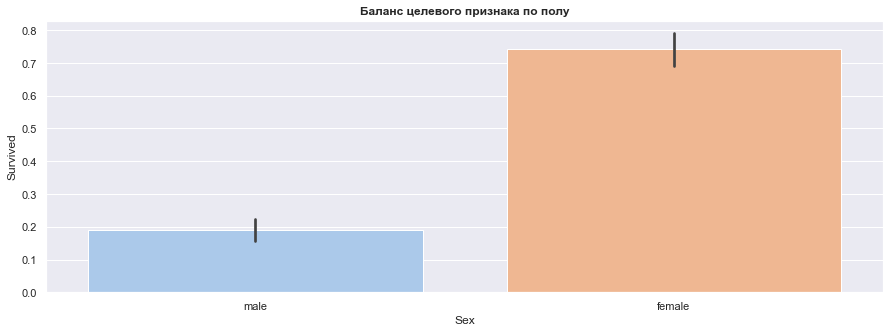

In [31]:
plots('Баланс целевого признака по полу', 'Sex')

Как видим, между признаком Sex и ЦП есть сильная корреляция. Женщины имеют максимальный шанс выжить, тогда как мужчины - нет.

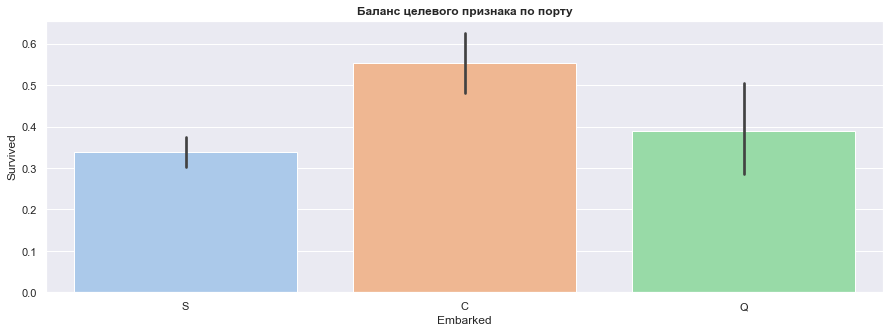

In [33]:
plots('Баланс целевого признака по порту', 'Embarked')

Пассажиры из Шербурга выживали чаще.

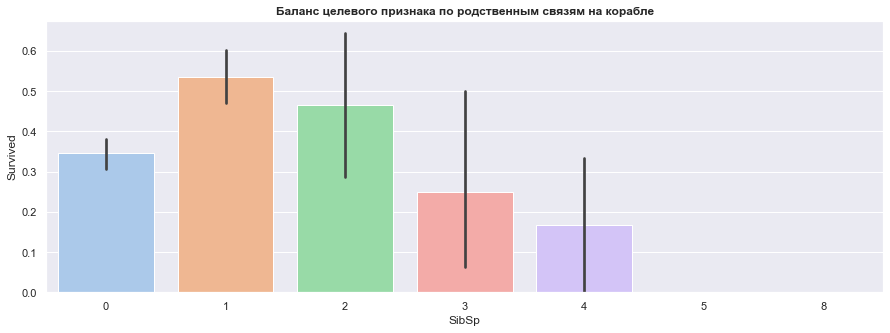

In [34]:
plots('Баланс целевого признака по родственным связям на корабле', 'SibSp')

In [35]:
test.loc[(test['SibSp']==5) | (test['SibSp']==8)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.90,NaN,S
188,1080,3,"Sage, Miss. Ada",female,27.0,8,2,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


Меньше всего шансов выжить, если у человека 3-4 родственника. Вариант с 5-8 родственниками являются либо выбросами, либо некорректной записью. В целом, больше всего шансов выжить у человека с одним родственником на борту.

Получается, больше всего шансов выжить имеет женщина с одним родственником на борту, первого класса и заплатившая большую сумму за билет.

# Обучение модели

## Подготовка данных

In [39]:
features_train, target_train = train.drop(columns='Survived', axis=1), train['Survived']
features_test = test.copy() #Разделение признаков

In [40]:
features_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
features_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [41]:
numeric = [*features_train.select_dtypes(exclude=['object']).columns]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) #Масштабирование

In [42]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True) #One Hot Encoding

In [43]:
features_train.shape

(891, 8)

In [44]:
features_test.shape

(418, 8)

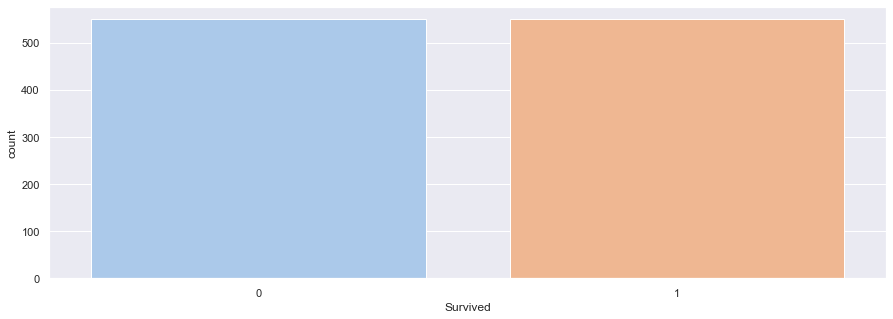

In [45]:
smote = SMOTE(random_state=1)
features_train, target_train = smote.fit_resample(features_train, target_train)
sns.countplot(target_train)
plt.show() #Балансировка

In [46]:
features_train.shape

(1098, 8)

In [47]:
target_train.shape

(1098,)

## Обучение

In [48]:
sampler = TPESampler(seed=10)
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 10, 100, 10)
    model_dt = DecisionTreeClassifier(random_state=1, criterion=criterion, 
                                     max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf,
                                     class_weight='balanced'
                                     )
    model_dt.fit(features_train , target_train)
    trial.set_user_attr(key="best_booster", value=model_dt)
    cross_valid = cross_val_score(model_dt, features_train, target_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return cross_valid
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=1000, callbacks=[callback])
model_dt = study.user_attrs["best_booster"]
print('Accuracy:', study.best_value, 'с параметрами:', study.best_params)

[I 2022-12-18 22:04:38,731] A new study created in memory with name: no-name-49e15f28-baef-4750-9c7c-86826918230c
[I 2022-12-18 22:04:40,238] Trial 0 finished with value: 0.7796471564964715 and parameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 80}. Best is trial 0 with value: 0.7796471564964715.
[I 2022-12-18 22:04:40,852] Trial 1 finished with value: 0.7796471564964715 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 80}. Best is trial 0 with value: 0.7796471564964715.
[I 2022-12-18 22:04:41,468] Trial 2 finished with value: 0.7796471564964715 and parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 100}. Best is trial 0 with value: 0.7796471564964715.
[I 2022-12-18 22:04:42,035] Trial 3 finished with value: 0.7687380655873806 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 70}. Best is trial 0 with value: 0.7796471564964715.
[I 2022-12-18 22:04:42,051] Trial 4 finished with value: 0.77964715

Accuracy: 0.8243254462432544 с параметрами: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 10}


F1: 0.8162150817512112 с параметрами: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 10}

In [49]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy'])
    n_estimators = trial.suggest_int('n_estimators', 3, 15, 3)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 10, 100, 10)
    model_rf = RandomForestClassifier(random_state=1, criterion=criterion,
                                     n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf,
                                     class_weight='balanced'
                                     )
    model_rf.fit(features_train , target_train)
    trial.set_user_attr(key="best_booster", value=model_rf)
    cross_valid = cross_val_score(model_rf, features_train, target_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return cross_valid
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=500, callbacks=[callback])
model_rf = study.user_attrs["best_booster"]
print('Accuracy:', study.best_value, 'с параметрами:', study.best_params)

[I 2022-12-18 22:05:06,237] A new study created in memory with name: no-name-5e7ad92a-246c-4093-aab3-149468a5919f
[I 2022-12-18 22:05:06,289] Trial 0 finished with value: 0.8024200913242009 and parameters: {'criterion': 'entropy', 'n_estimators': 9, 'max_depth': 9, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.8024200913242009.
[I 2022-12-18 22:05:06,348] Trial 1 finished with value: 0.7769281859692818 and parameters: {'criterion': 'entropy', 'n_estimators': 15, 'max_depth': 4, 'min_samples_leaf': 80}. Best is trial 0 with value: 0.8024200913242009.
[I 2022-12-18 22:05:06,394] Trial 2 finished with value: 0.7842050643420506 and parameters: {'criterion': 'entropy', 'n_estimators': 6, 'max_depth': 9, 'min_samples_leaf': 40}. Best is trial 0 with value: 0.8024200913242009.
[I 2022-12-18 22:05:06,429] Trial 3 finished with value: 0.7942175176421752 and parameters: {'criterion': 'entropy', 'n_estimators': 3, 'max_depth': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.802

Accuracy: 0.8297550850975508 с параметрами: {'criterion': 'entropy', 'n_estimators': 12, 'max_depth': 9, 'min_samples_leaf': 10}


F1: 0.8231913685320695 с параметрами: {'criterion': 'entropy', 'n_estimators': 12, 'max_depth': 9, 'min_samples_leaf': 10}

In [50]:
def objective(trial):
    algorithm = trial.suggest_categorical('algorithm', ['ball_tree','kd_tree', 'brute'])
    n_neighbors = trial.suggest_int('n_neighbors', 10, 30)
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)
    model_knn.fit(features_train , target_train)
    trial.set_user_attr(key="best_booster", value=model_knn)
    cross_valid = cross_val_score(model_knn, features_train, target_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return cross_valid
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100, callbacks=[callback])
model_knn = study.user_attrs["best_booster"]
print('Accuracy:', study.best_value, 'с параметрами:', study.best_params)

[I 2022-12-18 22:05:31,781] A new study created in memory with name: no-name-78b4e67a-183c-4a9c-9bdc-9f3b7cc727a3
[I 2022-12-18 22:05:31,808] Trial 0 finished with value: 0.8078995433789954 and parameters: {'algorithm': 'kd_tree', 'n_neighbors': 23}. Best is trial 0 with value: 0.8078995433789954.
[I 2022-12-18 22:05:31,869] Trial 1 finished with value: 0.8078829389788293 and parameters: {'algorithm': 'brute', 'n_neighbors': 26}. Best is trial 0 with value: 0.8078995433789954.
[I 2022-12-18 22:05:31,888] Trial 2 finished with value: 0.8069987546699876 and parameters: {'algorithm': 'ball_tree', 'n_neighbors': 20}. Best is trial 0 with value: 0.8078995433789954.
[I 2022-12-18 22:05:31,908] Trial 3 finished with value: 0.8143005396430054 and parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10}. Best is trial 3 with value: 0.8143005396430054.
[I 2022-12-18 22:05:31,969] Trial 4 finished with value: 0.8133623910336241 and parameters: {'algorithm': 'brute', 'n_neighbors': 21}. Best is t

Accuracy: 0.8161187214611871 с параметрами: {'algorithm': 'kd_tree', 'n_neighbors': 10}


F1: 0.8187602773594855 с параметрами: {'algorithm': 'ball_tree', 'n_neighbors': 21}

In [51]:
#Строим функцию для постройки ROC-AUC графика
def rocauc(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
def results(model, features, target):
    prediction = model.predict(features)
    proba_one = model.predict_proba(features)[:, 1]
    fpr, tpr, threshold = roc_curve(target, proba_one)
    rocauc(fpr, tpr)
    print("Accuracy:", round(accuracy_score(target, prediction), 3))
    print("F1:", round(f1_score(target, prediction), 3))
    print("ROC_auc:", round(roc_auc_score(target, prediction), 3))
    print("Precision:", round(precision_score(target, prediction), 3))
    print("Recall:", round(recall_score(target, prediction), 3))
    return prediction

## Проверка на тестовой выборке

In [55]:
target_test = gender_submission.Survived

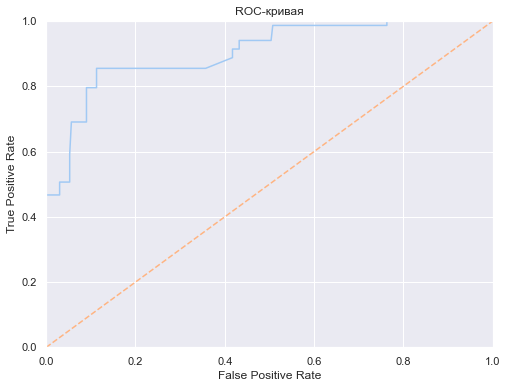

Accuracy: 0.73
F1: 0.697
ROC_auc: 0.757
Precision: 0.588
Recall: 0.855


In [56]:
prediction_dt = results(model_dt, features_test, target_test)

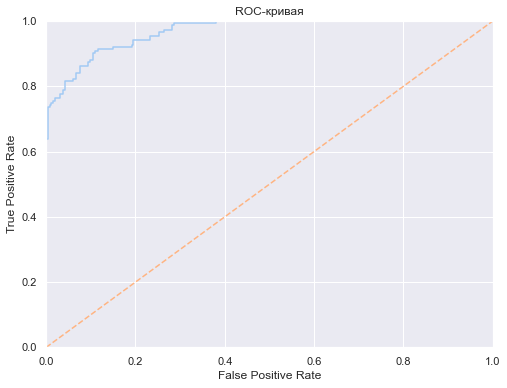

Accuracy: 0.895
F1: 0.859
ROC_auc: 0.892
Precision: 0.838
Recall: 0.882


In [57]:
prediction_rf = results(model_rf, features_test, target_test)

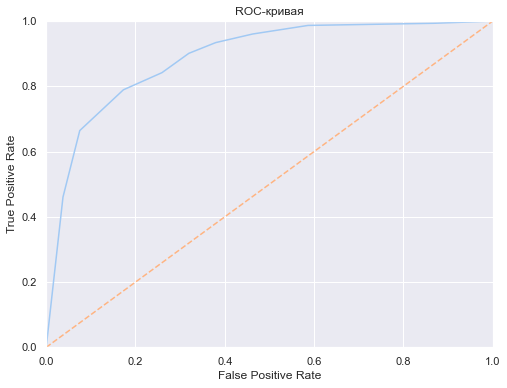

Accuracy: 0.778
F1: 0.734
ROC_auc: 0.791
Precision: 0.65
Recall: 0.842


In [58]:
prediction_knn = results(model_knn, features_test, target_test)

Как видим, самая адекватная модель - Random Forest c показателями F1: 0.8231913685320695 с параметрами: {'criterion': 'entropy', 'n_estimators': 12, 'max_depth': 9, 'min_samples_leaf': 10}. F1 на тестовой 0.859, что чуть выше, чем на тренировочной кроссвалидации.

Далее идет KNeighbors F1: 0.8187602773594855 с параметрами: {'algorithm': 'ball_tree', 'n_neighbors': 21}. F1 на тестовой 0,801. 

Decision Tree переобучилась, так что отбраковываем.

In [59]:
output = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived' : prediction_rf})
output.to_csv('submission.csv', index=False)

In [60]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
#joblib.dump(model_rf, 'model_rf.pkl') #Сохраняем модель
#best_model = joblib.load('model_rf.pkl') #Загружаем